# Exploración inicial de los datos

A continuación se presenta la exploración inicial del conjunto de datos acerca del data set **EvaluacionAgro.cvs** correspondiente a evaluaciones agropecuarias en los departamentos de Boyacá y Cundinamarca

In [13]:
#importaciones de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# importacion de los datos a df_agro
df_agro = pd.read_csv(r'..\\Bases de datos\\EvaluacionAgro.csv',sep=';')
df_agro.head()

,codDaneDpto,Dpto,codDaneMunicipio,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,codCultivo,nombreCientificoCultivo,estadoFisicoCultivo
0,15,Boyacá,15001,Tunja,Fresa,Fresa,Permanente,Frutales,Demas frutales,2019,C,3,3,30,10,2042700,Fragaria vesca,En fresco
1,15,Boyacá,15001,Tunja,Avena,Avena,Transitorio,Cereales,Cereales,2019,A,160,160,480,3,1010200,Avena sativa,En fresco
2,15,Boyacá,15001,Tunja,Cebada,Cebada,Transitorio,Cereales,Cereales,2019,A,20,20,60,3,1010300,Hordeum vulgare,En fresco
3,15,Boyacá,15001,Tunja,Maíz Tradicional,Maíz,Transitorio,Cereales,Cereales,2019,A,180,180,360,2,1010497,Zea mays,En fresco
4,15,Boyacá,15001,Tunja,Cebolla De Bulbo,Cebolla De Bulbo,Transitorio,Hortalizas,Hortalizas de raíz,2019,A,120,120,2400,20,1051100,Allium cepa,En fresco


## Descripción general del dataSet

In [15]:
#Tamaño de la muestra
print(f'El tamaño del data set es : {df_agro.shape} registros')
# Descripción de las variales
print('\n','tipos de variables por columna \n',df_agro.info())

El tamaño del data set es : (18337, 18) registros
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18337 entries, 0 to 18336
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   codDaneDpto              18337 non-null  int64 
 1   Dpto                     18337 non-null  object
 2   codDaneMunicipio         18337 non-null  int64 
 3   Municipio                18337 non-null  object
 4   desagregacionCultivo     18337 non-null  object
 5   Cultivo                  18337 non-null  object
 6   cicloDelCultivo          18337 non-null  object
 7   grupoCultivo             18337 non-null  object
 8   Subgrupo                 18337 non-null  object
 9   Anio                     18337 non-null  int64 
 10  Periodo                  18337 non-null  object
 11  areaSembradaHa           18337 non-null  object
 12  areaCosechadaHa          18337 non-null  object
 13  produccionTon            18337 non-null  

In [16]:
# Variables nulas
print('Visualización de registros nulos por columna')
df_agro.isnull().sum()

Visualización de registros nulos por columna


codDaneDpto                0
Dpto                       0
codDaneMunicipio           0
Municipio                  0
desagregacionCultivo       0
Cultivo                    0
cicloDelCultivo            0
grupoCultivo               0
Subgrupo                   0
Anio                       0
Periodo                    0
areaSembradaHa             0
areaCosechadaHa            0
produccionTon              0
rendimientoTonHa           0
codCultivo                 0
nombreCientificoCultivo    0
estadoFisicoCultivo        0
dtype: int64

In [17]:
df_agro.columns

Index(['codDaneDpto', 'Dpto', 'codDaneMunicipio', 'Municipio',
       'desagregacionCultivo', 'Cultivo', 'cicloDelCultivo', 'grupoCultivo',
       'Subgrupo', 'Anio', 'Periodo', 'areaSembradaHa', 'areaCosechadaHa',
       'produccionTon', 'rendimientoTonHa', 'codCultivo',
       'nombreCientificoCultivo', 'estadoFisicoCultivo'],
      dtype='object')

## **Distribuciones de Variables**
El data set cuenta con diversos tipos de datos, se hara una exploración inicial según el tipo de datos separando por un tipos Categorico y Númerico

### ***Datos Categoricos***

* codDaneDpto
* Dpto
* codDaneMunicipio
* Municipio
* desagregacionCultivo 
* Cultivo 
* cicloDelCultivo
* grupoCultivo
* Subgrupo
* nombreCientificoCultivo 
* estadoFisicoCultivo
* codCultivo
* Periodo


#### *CodDaneDpto y Dtpo*

Text(0.5, 1.0, 'Nombre del departamento')

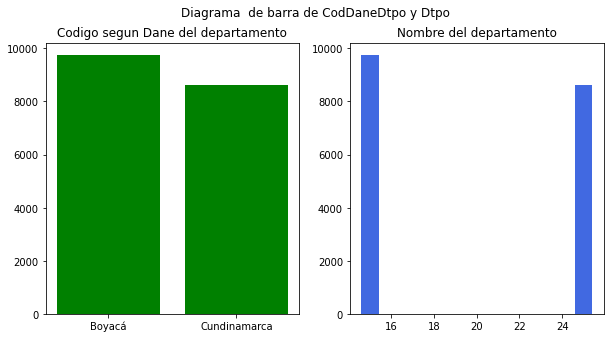

In [18]:
indicesDtpo = df_agro['Dpto'].unique()
countsDtpo = df_agro['Dpto'].value_counts()

indicescodDaneDtpo = df_agro['codDaneDpto'].unique()
countscodDaneDtpo = df_agro['codDaneDpto'].value_counts()

fig, ax = plt.subplots(nrows = 1,ncols=2,figsize = (10,5))
bar_width=1
plt.suptitle('Diagrama  de barra de CodDaneDtpo y Dtpo')
ax[0].bar(indicesDtpo,countsDtpo, color='green')
ax[1].bar(indicescodDaneDtpo,countscodDaneDtpo, color='royalblue')
ax[0].set_title('Codigo segun Dane del departamento')
ax[1].set_title('Nombre del departamento')

Dado que las gráficas de frecuencia representadas anteriormente muestran que este campo corresponde al mismo registro, donde una columna representa el nombre y la otra el código asociado a dicho nombre, es pertinente evitar la redundancia en los datos. Para mantener la calidad, eficiencia y claridad de los datos, se recomienda quedarnos únicamente con el campo ‘Dpto’, ya que este es más descriptivo para nuestro dataset

#### *CodDaneMunicipio*

In [19]:
df_MunB = df_agro[df_agro['Dpto'] == 'Boyacá']
df_MunB[['Municipio','codDaneMunicipio']].value_counts()

Municipio  codDaneMunicipio
La Uvita   15403               135
Monguí     15466               135
Soatá      15753               135
Duitama    15238               133
Sogamoso   15759               129
                              ... 
Mongua     15464                36
Pesca      15542                35
Floresta   15276                35
Iza        15362                25
Sáchica    15638                16
Length: 123, dtype: int64

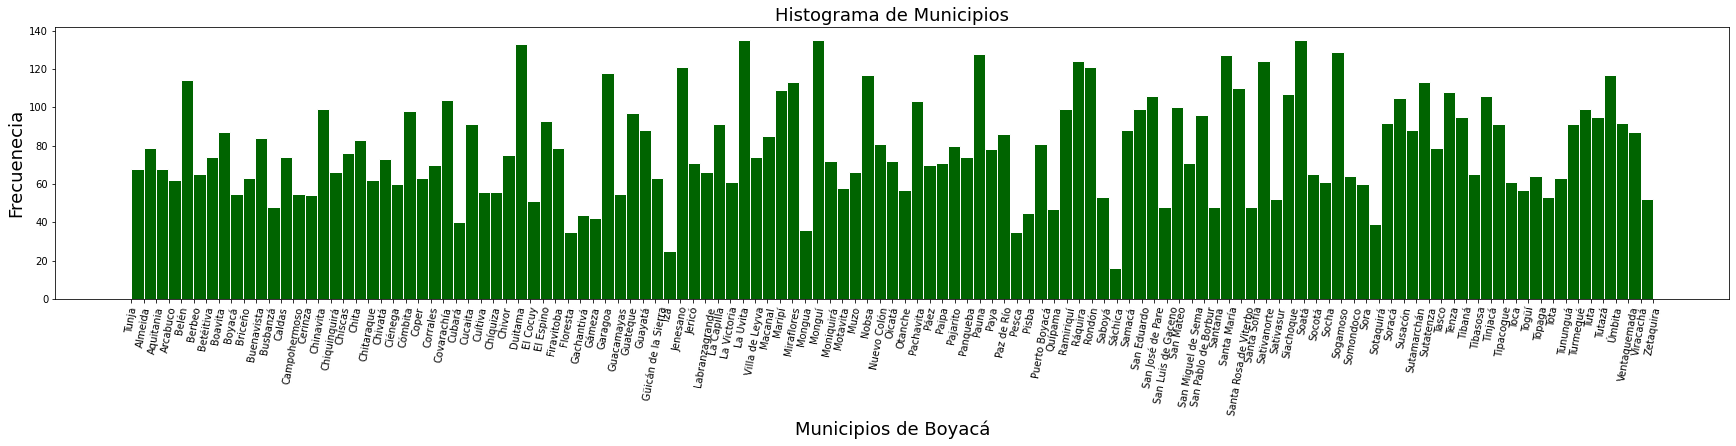

In [20]:
plt.figure(figsize=(30,5))
plt.hist(x = df_MunB['Municipio'], bins=123,edgecolor = 'white',color='darkgreen')
plt.tick_params(axis='x',rotation=80)
plt.xlabel('Municipios de Boyacá',fontsize = 18)
plt.ylabel('Frecuenecia',fontsize = 18)
plt.title('Histograma de Municipios',fontsize = 18)
plt.show()

In [21]:
df_MunC = df_agro[df_agro['Dpto'] == 'Cundinamarca']
df_MunC[['Municipio','codDaneMunicipio']].value_counts()

Municipio  codDaneMunicipio
Cajicá     25126               151
Granada    25312               150
Pandi      25524               150
Manta      25436               139
Quipile    25596               138
                              ... 
Tausa      25793                36
Gutiérrez  25339                28
Nariño     25483                26
Nemocón    25486                25
Guataquí   25324                16
Length: 116, dtype: int64

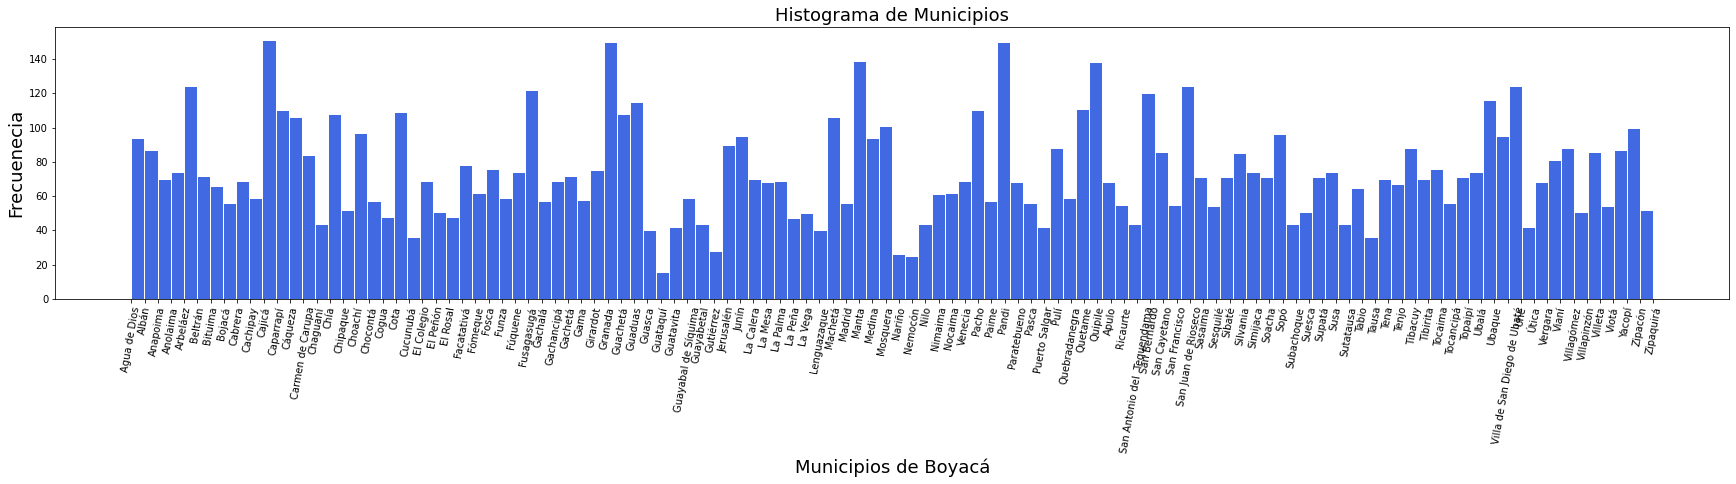

In [22]:
plt.figure(figsize=(30,5))
plt.hist(x = df_MunC['Municipio'], bins=116,edgecolor = 'white',color='royalblue')
plt.tick_params(axis='x',rotation=80)
plt.xlabel('Municipios de Boyacá',fontsize = 18)
plt.ylabel('Frecuenecia',fontsize = 18)
plt.title('Histograma de Municipios',fontsize = 18)
plt.show()

Dado que las gráficas de frecuencia representadas anteriormente muestran que este campo corresponde al mismo registro, donde una columna representa el nombre y la otra el código asociado a dicho nombre, es pertinente evitar la redundancia en los datos. Para mantener la calidad, eficiencia y claridad de los datos, se recomienda quedarnos únicamente con el campo ‘Municipio’, ya que este es más descriptivo para nuestro dataset

#### *desagregacionCultivo y  CodCultivo*

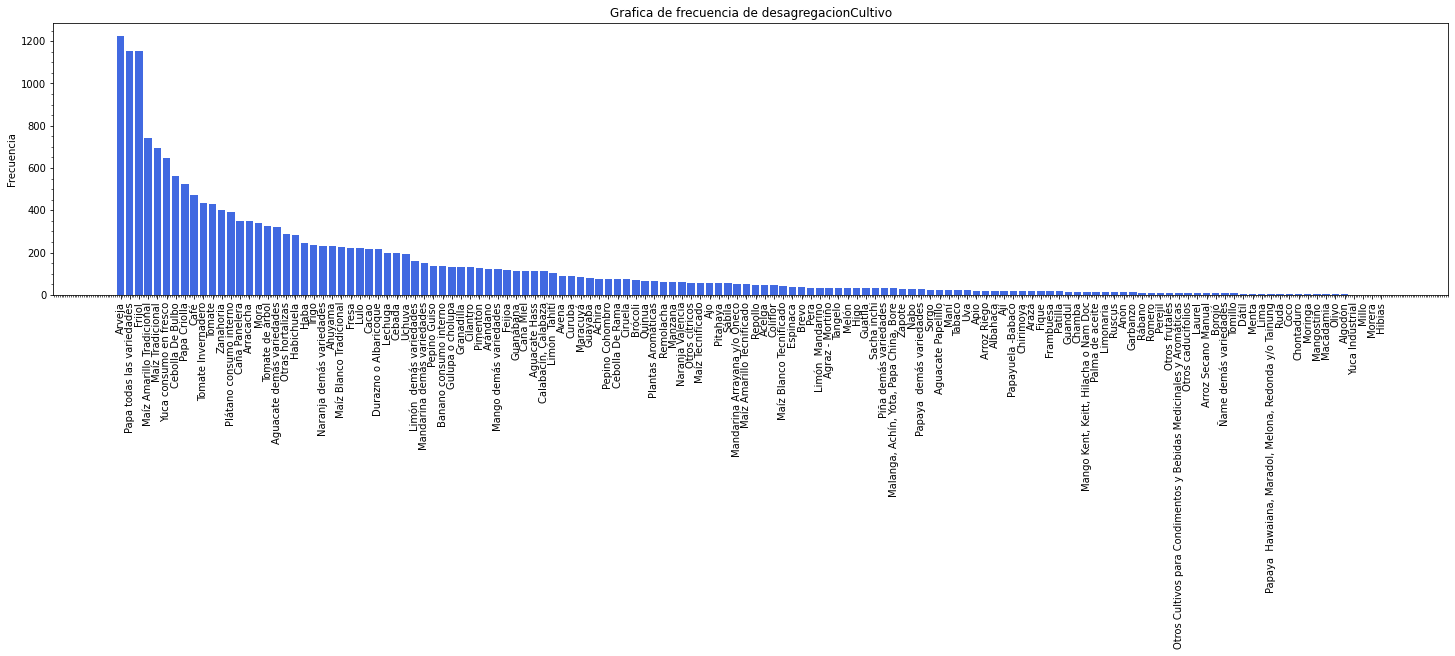

In [23]:
#grafica de desagregacionCultivo 
countsIndices = df_agro['desagregacionCultivo'].value_counts()
indices = countsIndices.index

plt.figure(figsize=(25,5))
plt.bar(indices,
        countsIndices,
        color = 'royalblue')
plt.title('Grafica de frecuencia de desagregacionCultivo')
plt.ylabel('Frecuencia')
plt.minorticks_on()
plt.grid
plt.tick_params(axis='x',rotation=90)
plt.show()

In [24]:
df_agro['desagregacionCultivo'].value_counts()

Arveja                       1225
Papa todas las variedades    1154
Frijol                       1152
Maíz Amarillo Tradicional     741
Maíz Tradicional              694
                             ... 
Algodón                         2
Yuca Industrial                 1
Millo                           1
Morera                          1
Hibias                          1
Name: desagregacionCultivo, Length: 138, dtype: int64

In [25]:
df_agro['codCultivo'].value_counts()

1060100    1225
1080701    1154
1060200    1152
1010402     741
1010497     694
           ... 
1030100       2
1081002       1
1010500       1
2044800       1
1080800       1
Name: codCultivo, Length: 138, dtype: int64

Dada que las columnas 'desagregacionCultivo' y 'codCultivo'corresponden al nombre y la otra el código asociado a dicho nombre, es pertinente evitar la redundancia en los datos. Para mantener la calidad, eficiencia y claridad de los datos, se recomienda quedarnos únicamente con el campo 'desagregacionCultivo', ya que este es más descriptivo para nuestro dataset

#### *Cultivo*

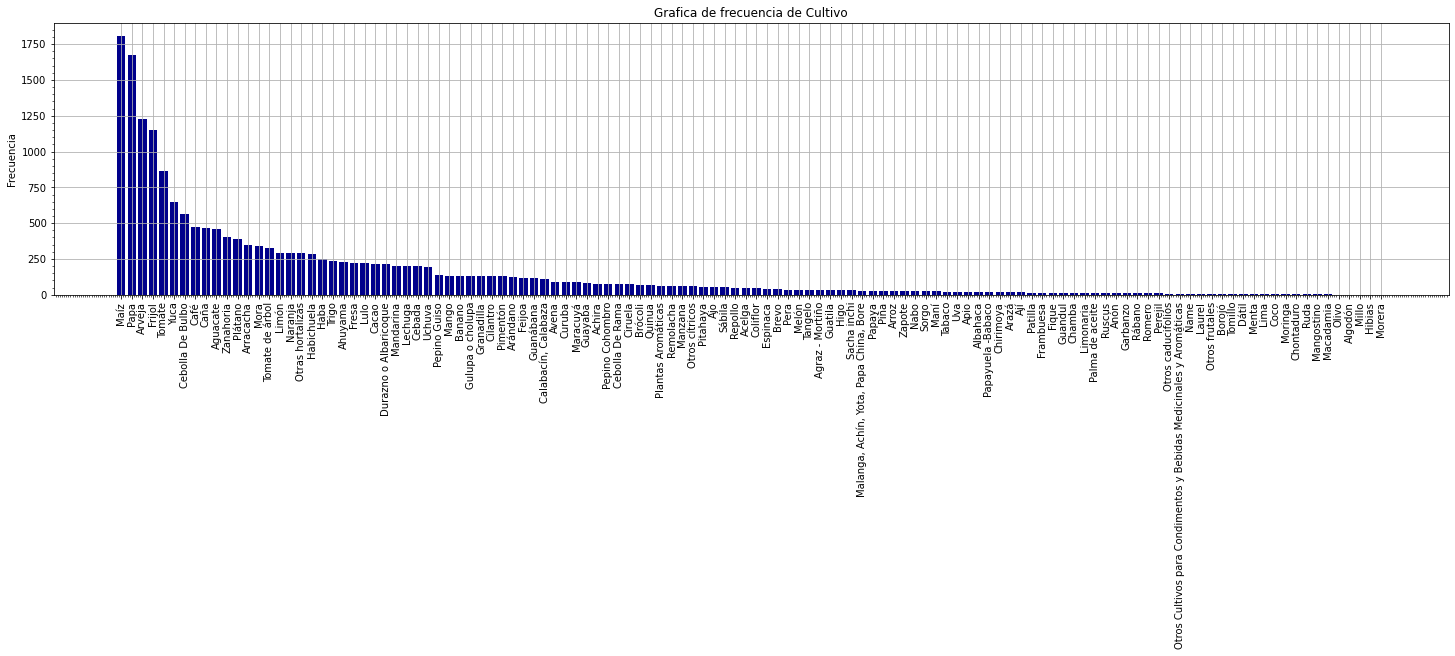

In [26]:
#grafica de Cultivo 
countsIndicesCul = df_agro['Cultivo'].value_counts()
indicesCul = countsIndicesCul.index

plt.figure(figsize=(25,5))
plt.bar(indicesCul,
        countsIndicesCul,
        color = 'darkblue')
plt.title('Grafica de frecuencia de Cultivo')
plt.ylabel('Frecuencia')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

#### *CicloCultivo*

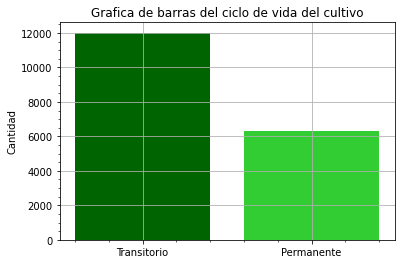

In [27]:
countCiclo = df_agro['cicloDelCultivo'].value_counts()
indicesCiclo=  countCiclo.index

# plt.figure(figsize=(5,5))
plt.bar(indicesCiclo,
        countCiclo,
        color = ['darkgreen','limegreen'])
plt.title('Grafica de barras del ciclo de vida del cultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
# plt.tick_params(axis='x',rotation=90)
plt.show()

#### GrupoCultivo

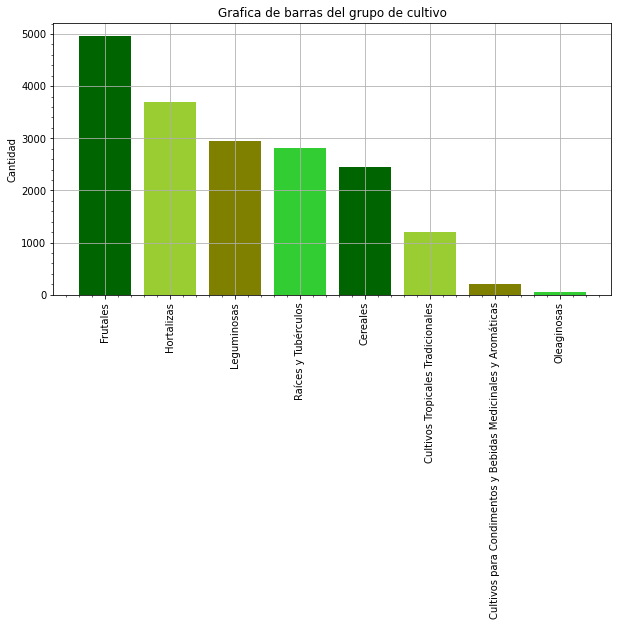

In [28]:
countGrupo = df_agro['grupoCultivo'].value_counts()
indicesGrupo=  countGrupo.index

plt.figure(figsize=(10,5))
plt.bar(indicesGrupo,
        countGrupo,
        color = ['darkgreen','yellowgreen','olive','limegreen'])
plt.title('Grafica de barras del grupo de cultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

#### SubGrupo

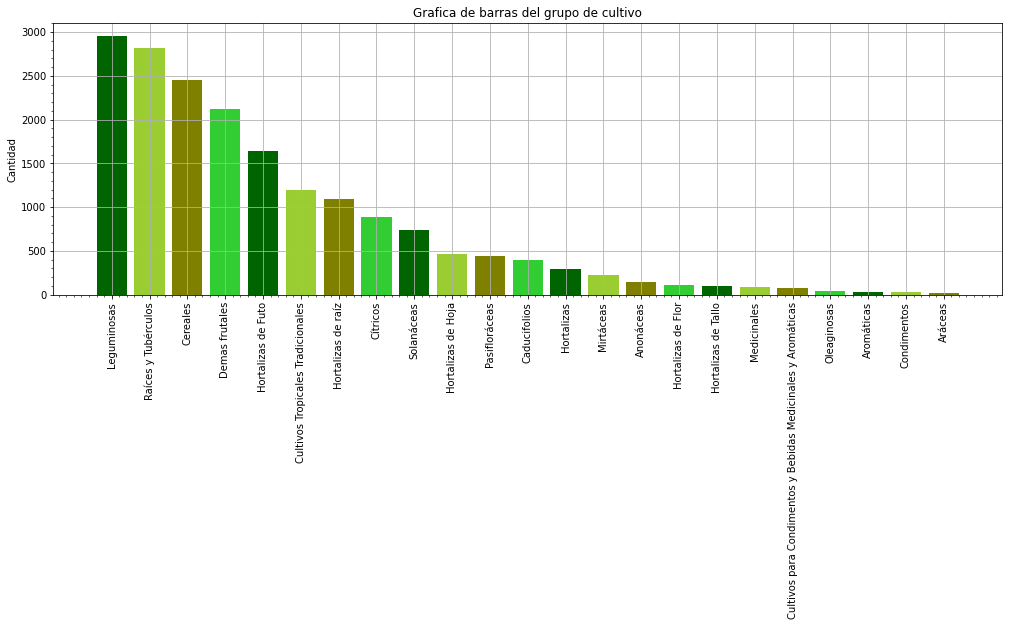

In [29]:
countGrupo = df_agro['Subgrupo'].value_counts()
indicesGrupo=  countGrupo.index

plt.figure(figsize=(17,5))
plt.bar(indicesGrupo,
        countGrupo,
        color = ['darkgreen','yellowgreen','olive','limegreen'])
plt.title('Grafica de barras del grupo de cultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

####  *nombreCientificoCultivo*

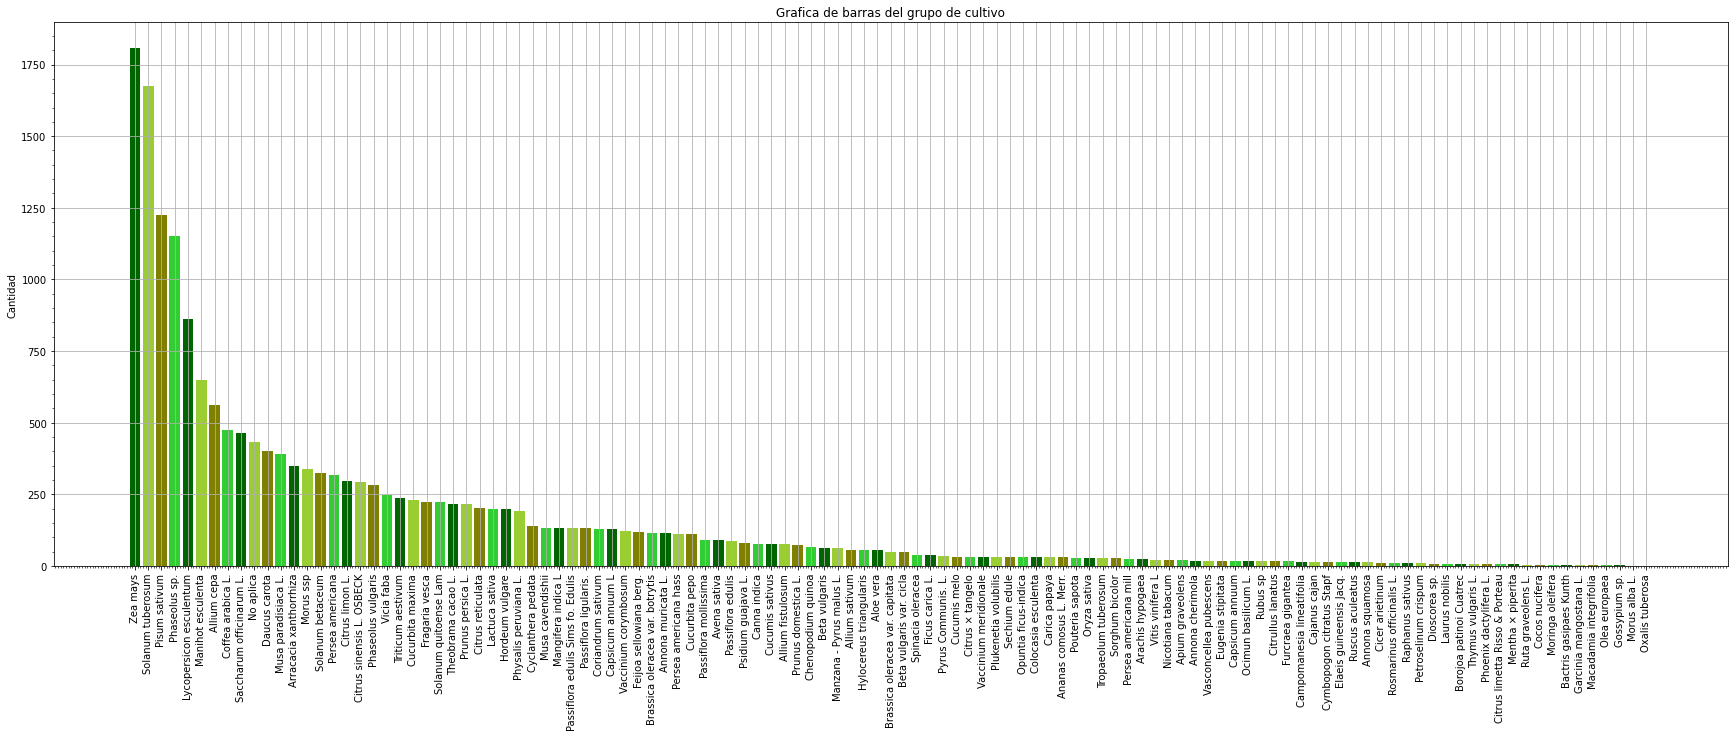

In [30]:
countNombreCultivo = df_agro['nombreCientificoCultivo'].value_counts()
indicesNombreCultivo=  countNombreCultivo.index

plt.figure(figsize=(30,10))
plt.bar(indicesNombreCultivo,
        countNombreCultivo,
        color = ['darkgreen','yellowgreen','olive','limegreen'])
plt.title('Grafica de barras del grupo de cultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

#### *estadoFisicoCultivo*

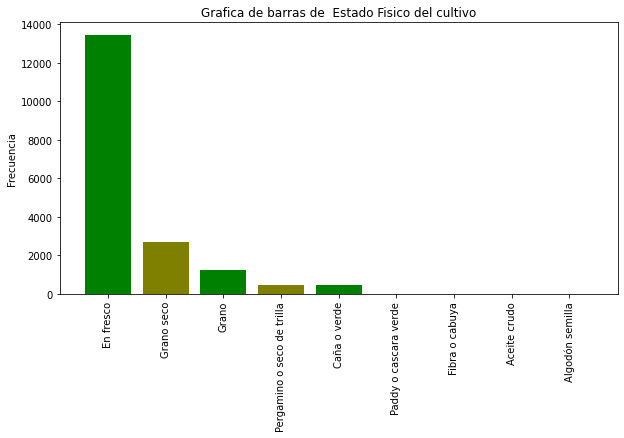

In [31]:
countEstado = df_agro['estadoFisicoCultivo'].value_counts()
indecesEstado = countEstado.index
plt.figure(figsize=(10,5))
plt.bar(indecesEstado,countEstado,color = ['green','olive'])
plt.title('Grafica de barras de  Estado Fisico del cultivo')
plt.ylabel('Frecuencia')
plt.tick_params(axis='x',rotation= 90)
plt.show()

In [34]:
countEstado

En fresco                     13420
Grano seco                     2697
Grano                          1225
Pergamino o seco de trilla      474
Caña o verde                    463
Paddy o cascara verde            28
Fibra o cabuya                   16
Aceite crudo                     12
Algodón semilla                   2
Name: estadoFisicoCultivo, dtype: int64

#### *Periodo*

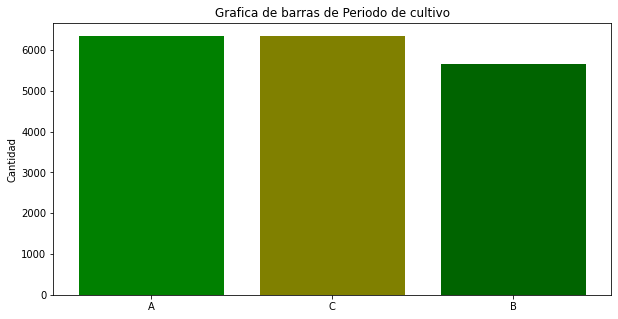

In [33]:
countPeriodo = df_agro['Periodo'].value_counts()
indecesPeriodo = countPeriodo.index
plt.figure(figsize=(10,5))
plt.bar(indecesPeriodo,countPeriodo,color = ['green','olive','darkgreen'])
plt.title('Grafica de barras de Periodo de cultivo')
plt.ylabel('Cantidad')
plt.show()